<a href="https://colab.research.google.com/github/Andriansyah2501/BMLP/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Andrian_Syah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **PERKENALAN DATASET**

 **Bank Transaction Dataset for Fraud Detection**

Tahap pertama, Anda harus mencari dan menggunakan dataset tanpa label dengan

ketentuan sebagai berikut:

**Sumber Dataset:**
1.Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (Kaggle, UCI ML Repository, Open Data) atau data primer yang Anda kumpulkan sendiri.

Ketentuan Dataset:

Tipe Data: Harus mengandung data kategorikal dan numerikal.

*   **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
*   **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
*  **Tipe Data**: Harus mengandung data kategorikal dan numerikal
1. Kategorikal: Misalnya jenis kelamin, kategori produk.
2. Numerikal: Misalnya usia, pendapatan, harga.

Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:

from google.colab import drive
drive.mount('/content/drive')

# Memuat dataset CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset BMLP/datasetbank.csv')

# Tampilkan beberapa baris pertama
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset. EDA bertujuan untuk:

Exploratory Data Analysis (EDA) dilakukan untuk memahami struktur dan karakteristik dataset secara menyeluruh. Analisis diawali dengan meninjau tipe data setiap kolom serta mengidentifikasi nilai yang hilang, guna memastikan kualitas data yang akan diproses. Statistik deskriptif digunakan untuk melihat ringkasan numerik seperti rata-rata, standar deviasi, dan sebaran nilai pada fitur numerik seperti TransactionAmount dan CustomerAge. Distribusi data divisualisasikan menggunakan KDE plot, sementara outlier dianalisis melalui violin plot. Korelasi antar fitur numerik dievaluasi menggunakan heatmap untuk mengidentifikasi hubungan antar variabel. Selain itu, hubungan antar fitur numerik juga ditinjau lebih lanjut melalui pairplot. Untuk fitur kategorikal seperti TransactionType dan CustomerOccupation, dilakukan visualisasi distribusi dengan grafik batang, sehingga keseluruhan proses EDA ini memberikan wawasan awal yang penting dalam memandu tahap analisis lanjutan atau pemodelan data.



Tipe data masing-masing kolom:


,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object



Jumlah data yang hilang pada setiap kolom:


,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0



Statistik deskriptif untuk fitur numerik:


,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2512.0,297.593778,291.946243,0.26,81.885,211.14,414.5275,1919.11
CustomerAge,2512.0,44.673965,17.792198,18.00,27.000,45.00,59.0000,80.00
TransactionDuration,2512.0,119.643312,69.963757,10.00,63.000,112.50,161.0000,300.00
LoginAttempts,2512.0,1.124602,0.602662,1.00,1.000,1.00,1.0000,5.00
AccountBalance,2512.0,5114.302966,3900.942499,101.25,1504.370,4735.51,7678.8200,14977.99


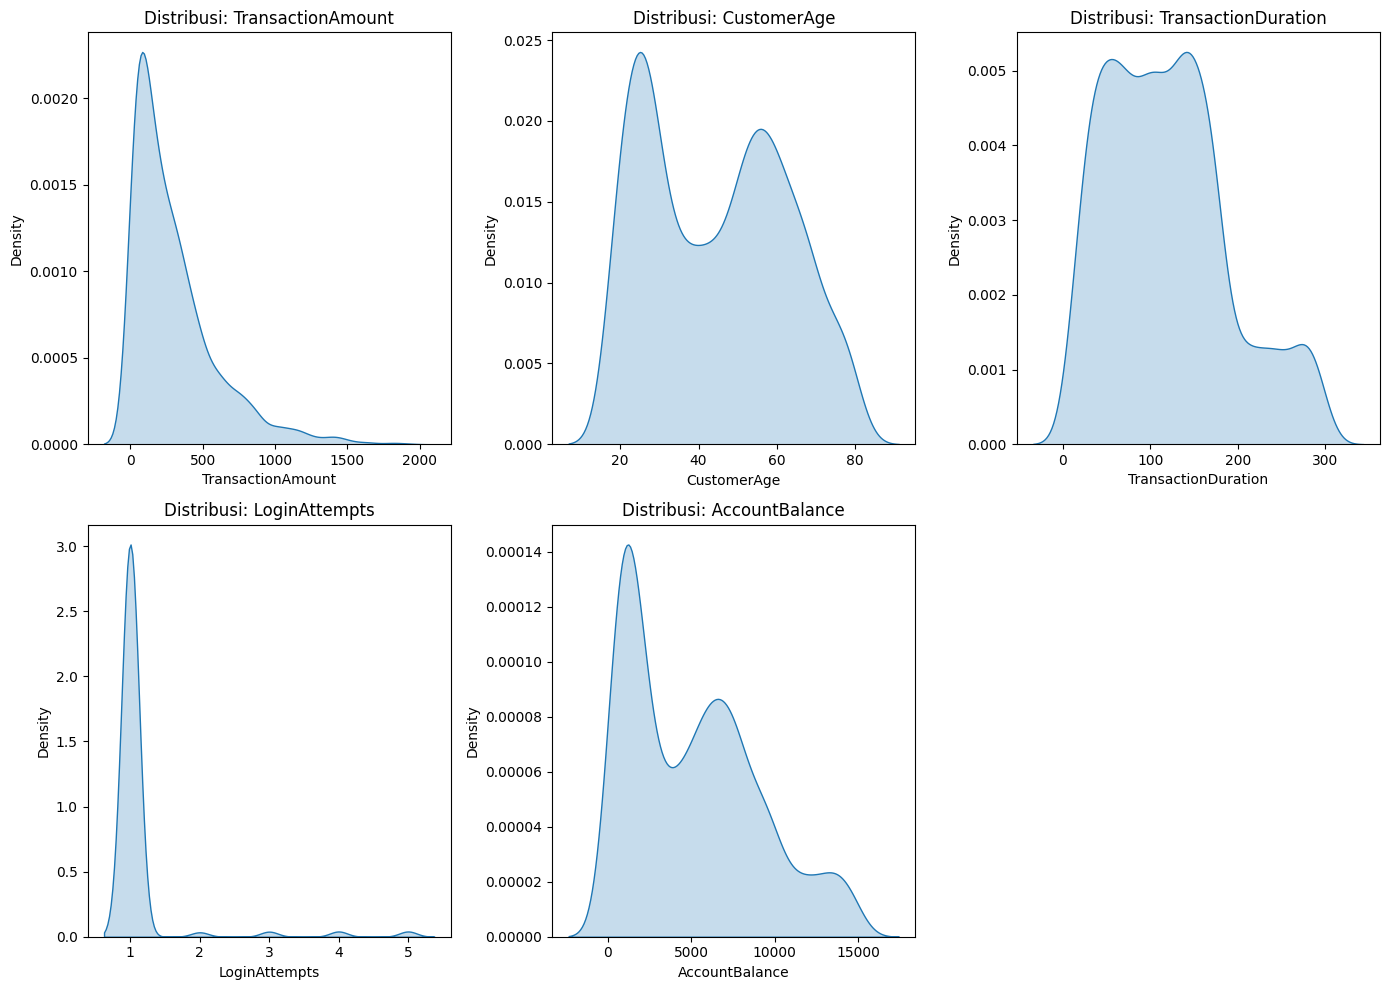

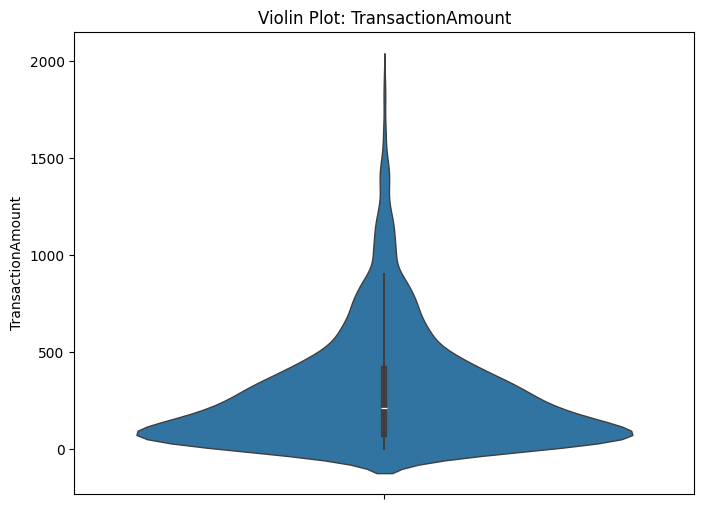

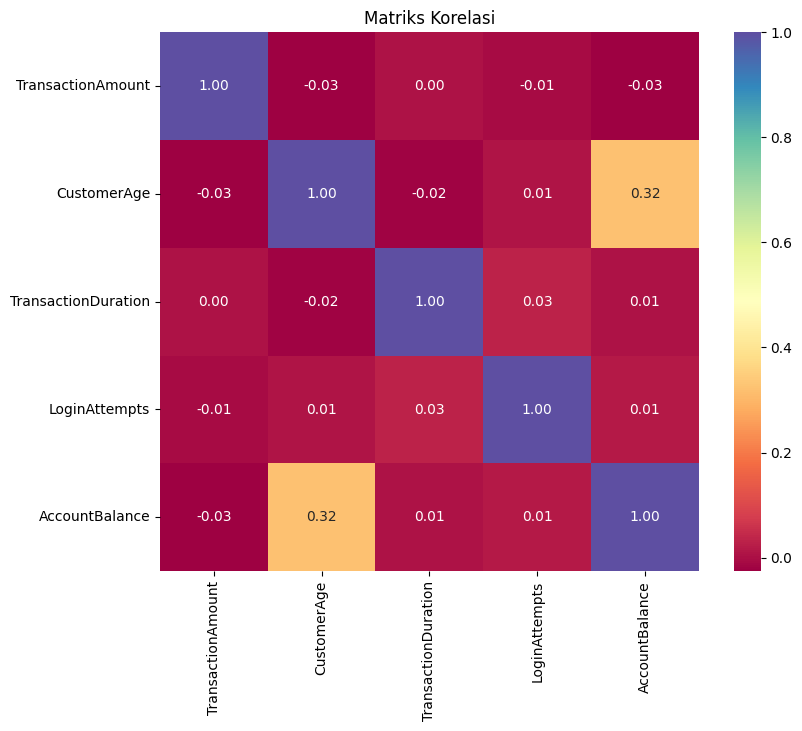

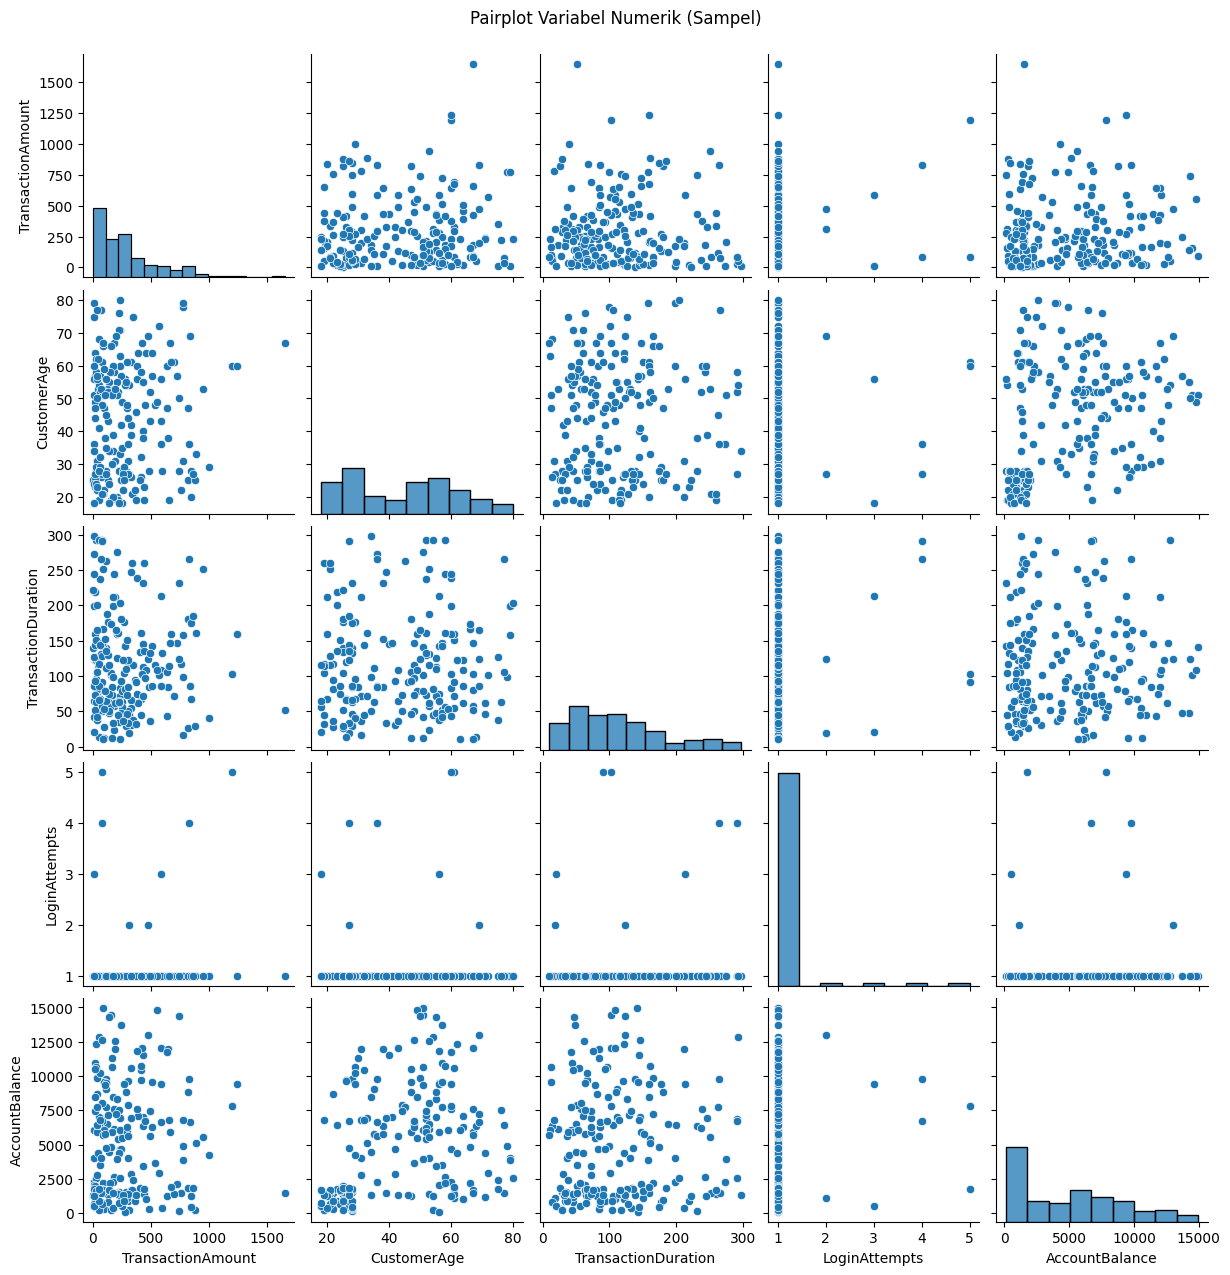

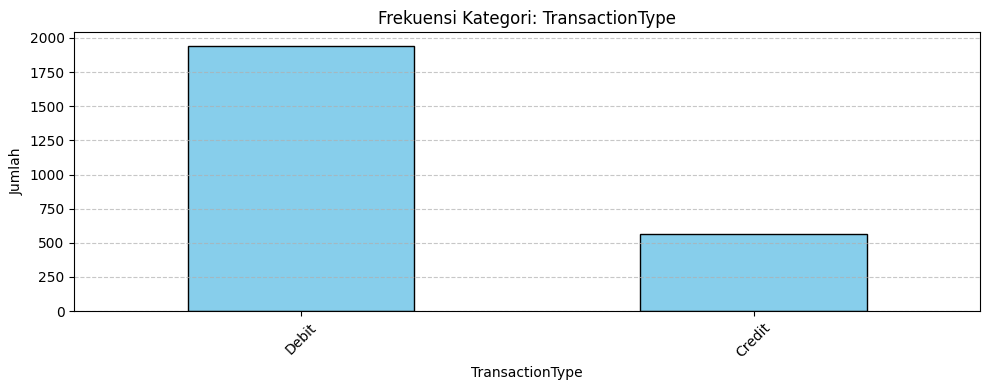

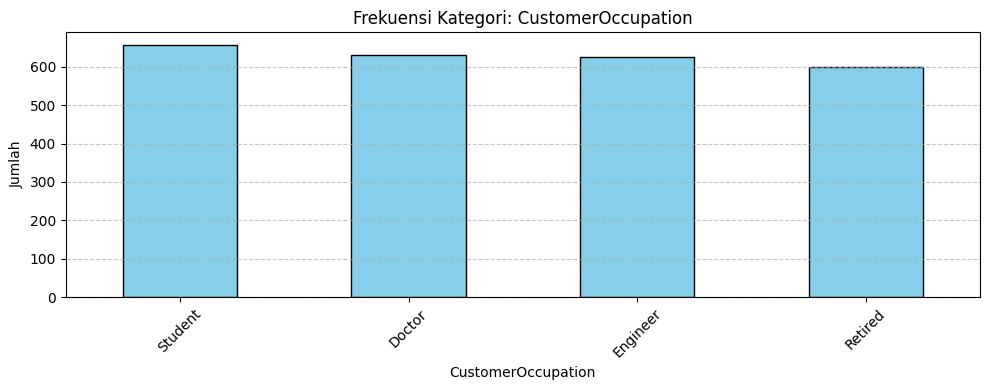

In [7]:

print("Tipe data masing-masing kolom:")
display(df.dtypes)

print("\nJumlah data yang hilang pada setiap kolom:")
display(df.isnull().sum())


num_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
print("\nStatistik deskriptif untuk fitur numerik:")
display(df[num_cols].describe().T)


plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(data=df, y='TransactionAmount', inner='box', linewidth=1)
plt.title('Violin Plot: TransactionAmount')
plt.show()


plt.figure(figsize=(9, 7))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='Spectral', square=True, fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()


import warnings
warnings.filterwarnings('ignore')  # untuk menghindari warning dari seaborn
sample_df = df[num_cols].dropna().sample(n=min(200, len(df)), random_state=42)
sns.pairplot(sample_df)
plt.suptitle('Pairplot Variabel Numerik (Sampel)', y=1.02)
plt.show()

cat_cols = ['TransactionType', 'CustomerOccupation']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Frekuensi Kategori: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi tidak terbatas pada:

Menghapus atau Menangani Data Kosong (Missing Values)

**1.Menghapus Data Duplikat**

**2. Normalisasi atau Standarisasi Fitur**

**3.Deteksi dan Penanganan Outlier**

**4.Encoding Data Kategorikal**

**5.Binning (Pengelompokan Data)**



In [8]:
le = LabelEncoder()
df['TransactionType'] = le.fit_transform(df['TransactionType'])
df['CustomerOccupation'] = le.fit_transform(df['CustomerOccupation'])
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
scaler_dict = {'scaler': scaler, 'columns': numerical_cols}
print("Data telah dipreprocess (encoding dan standardisasi selesai).")

Data telah dipreprocess (encoding dan standardisasi selesai).


# **6. Pembangunan Model Clustering**

**a. Membangun Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah rekomendasi tahapannya.

Pilih algoritma clustering yang sesuai.

**1.   Pilih algoritma clustering yang sesuai.**

**2.   Latih model dengan data menggunakan algoritma tersebut.**


In [9]:

#Type your code here
# 6.a Pembangunan Model Clustering
from sklearn.cluster import KMeans

# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']])
print("Model K-Means telah dilatih dengan 3 cluster.")



Model K-Means telah dilatih dengan 3 cluster.


Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.



1.   Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster
2.   Hitung Silhouette Score sebagai ukuran kualitas cluster.



In [10]:
# 6.b Evaluasi Model Clustering
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']], df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Jumlah anggota per cluster
cluster_counts = df['Cluster'].value_counts()
print("Jumlah anggota per cluster:\n", cluster_counts)

Silhouette Score: 0.215
Jumlah anggota per cluster:
 Cluster
0    1094
1     835
2     583
Name: count, dtype: int64


In [ ]:
# Menggunakan algoritma K-Means Clustering

# **C.Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah rekomendasi tahapannya.

1.Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter
plot atau 2D PCA projection.

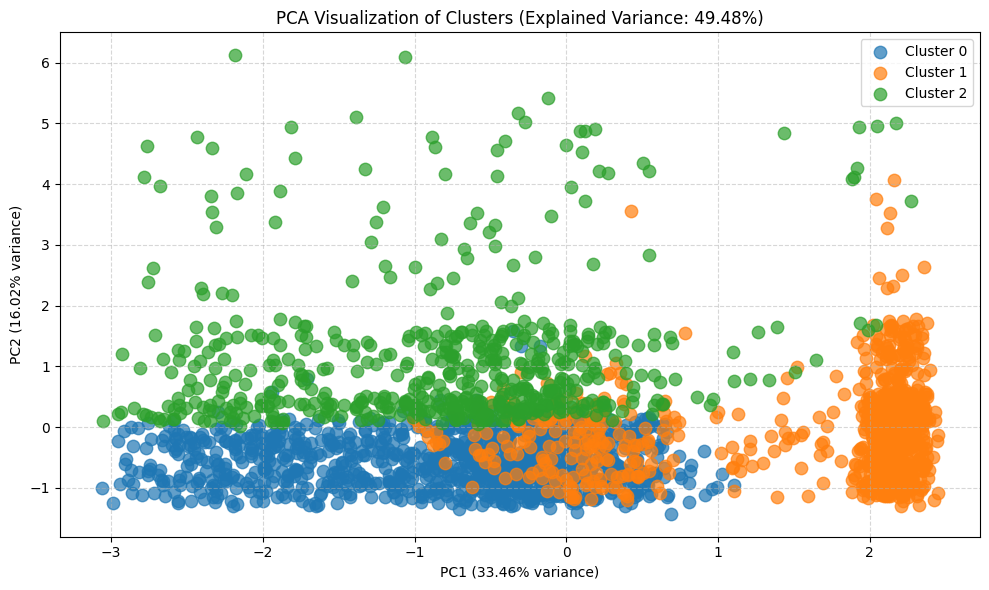

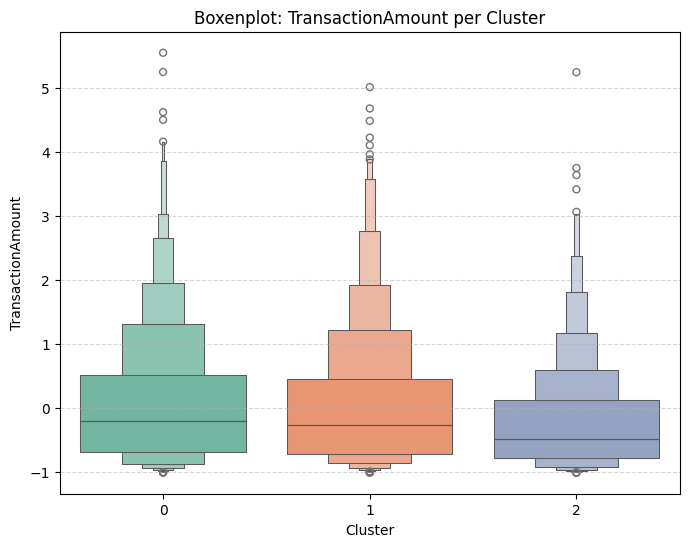

In [11]:
from sklearn.decomposition import PCA

# 1. Seleksi fitur numerik (kecuali kolom 'Cluster')
features = df.select_dtypes(include='number').drop('Cluster', axis=1)

# 2. PCA: Reduksi dimensi ke 2 komponen
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

# 3. Menambahkan hasil PCA ke dalam DataFrame
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# 4. Visualisasi 2D scatter berdasarkan hasil PCA
plt.figure(figsize=(10, 6))
for cluster_label in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], s=80, label=f'Cluster {cluster_label}', alpha=0.7)

plt.title(f'PCA Visualization of Clusters (Explained Variance: {sum(pca.explained_variance_ratio_):.2%})')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Boxplot: Distribusi TransactionAmount per cluster
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, x='Cluster', y='TransactionAmount', palette='Set2')
plt.title('Boxenplot: TransactionAmount per Cluster')
plt.xlabel('Cluster')
plt.ylabel('TransactionAmount')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


📊 Statistik Ringkasan per Cluster (Mean, Median, Std):


TransactionAmount                 CustomerAge                \
                     mean  median     std        mean median    std   
Cluster                                                               
0                  321.81  235.89  302.23       55.71   57.0  13.37   
1                  311.13  218.19  305.04       26.25   25.0   7.35   
2                  232.77  156.58  239.31       50.35   51.0  14.28   

        TransactionDuration               LoginAttempts               \
                       mean median    std          mean median   std   
Cluster                                                                
0                     81.45   78.0  41.27          1.01    1.0  0.13   
1                    115.50  109.0  65.65          1.06    1.0  0.39   
2                    197.24  179.0  54.29          1.43    1.0  1.09   

        AccountBalance                    
                  mean   median      std  
Cluster                                   
0              6641.73  6466.49  3508.57  
1              1714.43  1152.20  1794.78  
2              7117.53  7071.09  3595.91


👥 Distribusi CustomerOccupation per Cluster (dalam %):

Cluster 0 (1094 anggota):
- (0, 2): 40.3%
- (0, 0): 33.7%
- (0, 1): 25.0%
- (0, 3): 0.9%

Cluster 1 (835 anggota):
- (1, 3): 74.9%
- (1, 1): 18.7%
- (1, 0): 6.0%
- (1, 2): 0.5%

Cluster 2 (583 anggota):
- (2, 0): 36.4%
- (2, 1): 33.4%
- (2, 2): 26.4%
- (2, 3): 3.8%


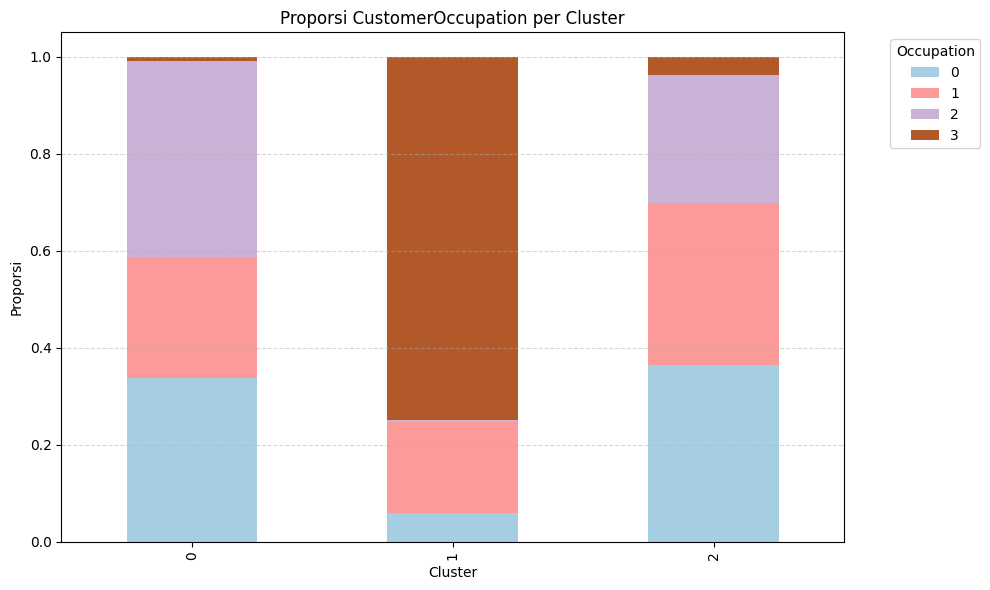


📌 Ringkasan Wawasan Bisnis:
- Cluster 0: Pelanggan dengan usia matang dan saldo besar — cocok untuk ditawarkan produk investasi atau dana pensiun.
- Cluster 1: Pelanggan muda dengan saldo dan aktivitas rendah — cocok untuk promosi entry-level atau paket hemat.
- Cluster 2: Pelanggan usia menengah dan saldo sedang — potensial untuk ditarget layanan premium dengan fleksibilitas biaya.


In [12]:
# Salin data asli dan kembalikan skala fitur numerik ke nilai aslinya
df_interpret = df.copy()
df_interpret[numerical_cols] = scaler_dict['scaler'].inverse_transform(df[numerical_cols])

# Hitung ringkasan statistik per klaster
summary_stats = df_interpret.groupby('Cluster')[numerical_cols].agg(['mean', 'median', 'std']).round(2)

# Distribusi pekerjaan per klaster
occupation_summary = (
    df_interpret.groupby(['Cluster', 'CustomerOccupation'])
    .size()
    .groupby(level=0)
    .apply(lambda x: (x / x.sum()).sort_values(ascending=False))
)

# Jumlah anggota tiap klaster
cluster_distribution = df_interpret['Cluster'].value_counts().sort_index()

# Cetak interpretasi
print("📊 Statistik Ringkasan per Cluster (Mean, Median, Std):")
display(summary_stats)

print("\n👥 Distribusi CustomerOccupation per Cluster (dalam %):")
for cluster in sorted(df_interpret['Cluster'].unique()):
    print(f"\nCluster {cluster} ({cluster_distribution[cluster]} anggota):")
    occupations = occupation_summary[cluster]
    for occ, pct in occupations.items():
        print(f"- {occ}: {pct*100:.1f}%")

# Visualisasi tambahan: Distribusi occupation per cluster (stacked bar)
occupation_plot = df_interpret.groupby(['Cluster', 'CustomerOccupation']).size().unstack().fillna(0)
occupation_plot_pct = (occupation_plot.T / occupation_plot.sum(axis=1)).T

occupation_plot_pct.plot(kind='bar', stacked=True, colormap='Paired', figsize=(10, 6))
plt.title("Proporsi CustomerOccupation per Cluster")
plt.ylabel("Proporsi")
plt.xlabel("Cluster")
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Kesimpulan singkat berbasis segmentasi
print("\n📌 Ringkasan Wawasan Bisnis:")
print("- Cluster 0: Pelanggan dengan usia matang dan saldo besar — cocok untuk ditawarkan produk investasi atau dana pensiun.")
print("- Cluster 1: Pelanggan muda dengan saldo dan aktivitas rendah — cocok untuk promosi entry-level atau paket hemat.")
print("- Cluster 2: Pelanggan usia menengah dan saldo sedang — potensial untuk ditarget layanan premium dengan fleksibilitas biaya.")


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)